## Data Visualization: Corruption and Human Development

In this project, we’ll create a The Economist style visualization, a scatter plot for the relationship between the ‘Human Development Index’ and the ‘Corruption Perceptions Index’ of countries.

- Bhavya Saini

In [ ]:
#as colab is based on python, hence I'm using this extension which allows us to run R codes in Google Colab
%load_ext rpy2.ipython

### Loading Libraries

In [3]:
%%R
library(data.table)
library(ggplot2)

### Reading CSV File

A high CPI indicates a lower level of corruption.

In [4]:
%%R
df <- fread(input='EconomistData.csv',drop = 1)

head(df)

       Country HDI.Rank   HDI CPI            Region
1: Afghanistan      172 0.398 1.5      Asia Pacific
2:     Albania       70 0.739 3.1 East EU Cemt Asia
3:     Algeria       96 0.698 2.9              MENA
4:      Angola      148 0.486 2.0               SSA
5:   Argentina       45 0.797 3.0          Americas
6:     Armenia       86 0.716 2.6 East EU Cemt Asia


### Creating Scatterplot

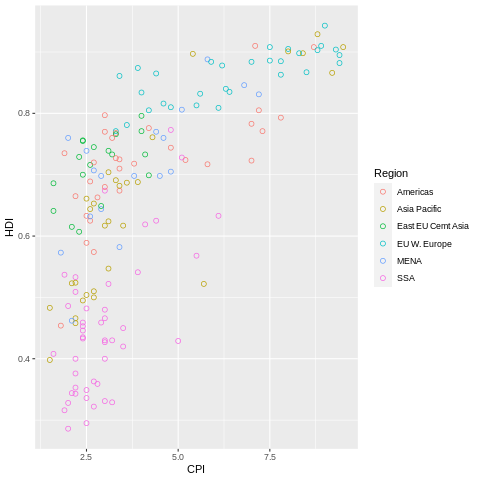

In [7]:
%%R
pl <- ggplot(df, aes(x=CPI,y=HDI,color=Region)) + geom_point(shape=1,size=2)

pl

Adding a trend line:

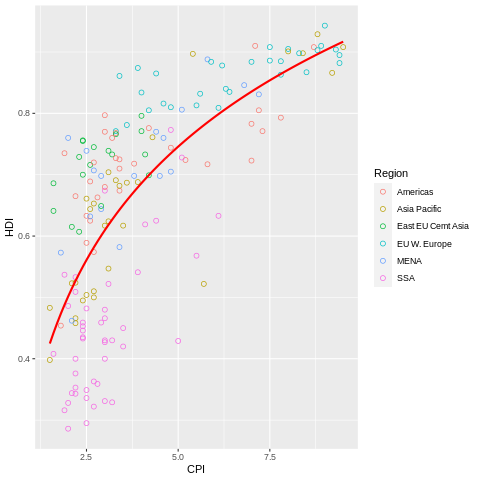

In [9]:
%%R
pl2 <- pl + geom_smooth(aes(group=1), method = 'lm', formula = y~log(x), se=FALSE, color='red')

pl2

Adding labels:

Since there are too many countries to label each one in the plot without making things chaotic, we’ll chose only a handful of them to label.

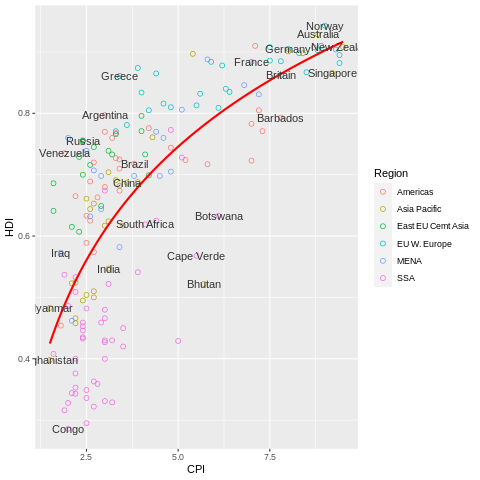

In [11]:
%%R
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Australia", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")


pl3 <- pl2 + geom_text(aes(label=Country), color='gray20', data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

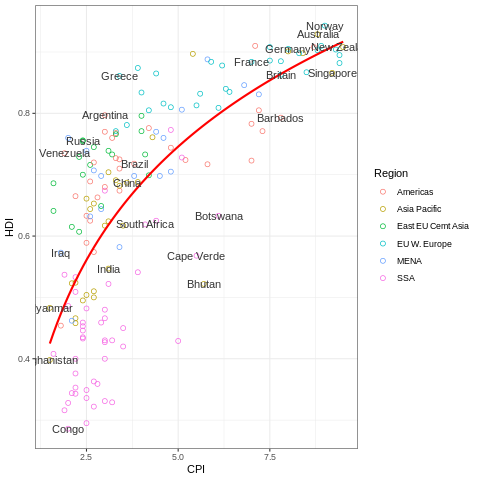

In [12]:
%%R
pl4 <- pl3 + theme_bw()

pl4

Adding scales to the x and y axis:

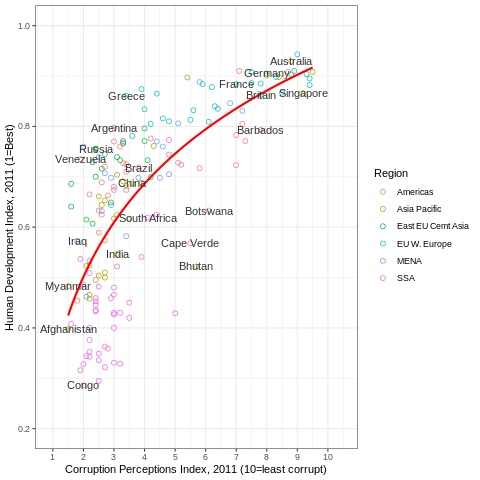

In [14]:
%%R
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)",limits = c(.9, 10.5),breaks=1:10) + scale_y_continuous(name = "Human Development Index, 2011 (1=Best)",limits = c(0.2, 1.0))

pl5

Adding a title:

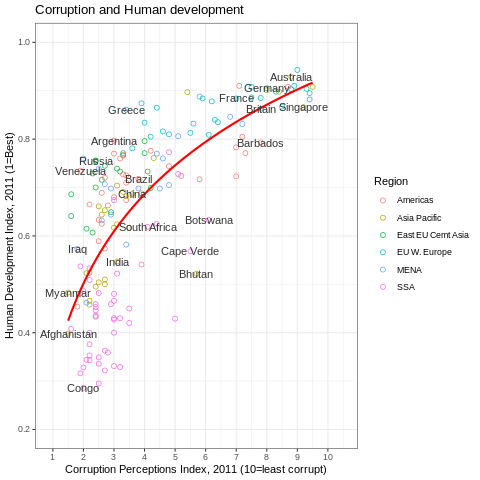

In [15]:
%%R
pl6 <- pl5 + ggtitle("Corruption and Human development")

pl6